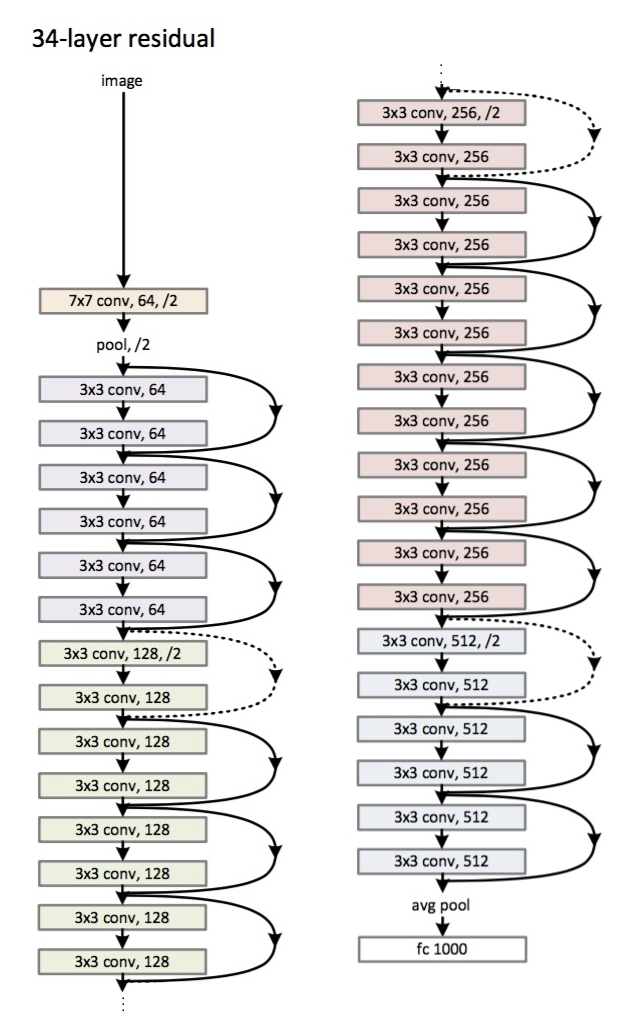

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
# example of loading the MobileNet model
from keras.applications.resnet50 import ResNet50
model = ResNet50(include_top=False, weights= None, input_shape=(32, 32, 3))
# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
len(model.layers)

175

In [ ]:
# add new classifier layers for cifar10 classification
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

flat = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat)
class2 = Dense(512, activation='relu')(class1)

prediction = Dense(10, activation='softmax')(class2)

model = Model(inputs=model.inputs, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test),
    batch_size=128
)

Epoch 1/20
391/391 [==============================] - 69s 82ms/step - loss: 1.8213 - accuracy: 0.3476 - val_loss: 1.7468 - val_accuracy: 0.3732
Epoch 2/20
391/391 [==============================] - 29s 74ms/step - loss: 1.3640 - accuracy: 0.5111 - val_loss: 1.5397 - val_accuracy: 0.4760
Epoch 3/20
391/391 [==============================] - 29s 73ms/step - loss: 1.1483 - accuracy: 0.5933 - val_loss: 1.6375 - val_accuracy: 0.4734
Epoch 4/20
391/391 [==============================] - 29s 75ms/step - loss: 1.0038 - accuracy: 0.6491 - val_loss: 1.1638 - val_accuracy: 0.6029
Epoch 5/20
391/391 [==============================] - 29s 73ms/step - loss: 0.8716 - accuracy: 0.6976 - val_loss: 1.3695 - val_accuracy: 0.5548
Epoch 6/20
391/391 [==============================] - 29s 74ms/step - loss: 0.7659 - accuracy: 0.7344 - val_loss: 1.4033 - val_accuracy: 0.5749
Epoch 7/20
391/391 [==============================] - 29s 74ms/step - loss: 0.6792 - accuracy: 0.7641 - val_loss: 1.3044 - val_accuracy:

In [ ]:
i = 0
for layer in model.layers:
  if 'out' in layer.name:
    print("Layer number: ", i, ", Name: ", layer.name)
  i += 1

Layer number:  18 , Name:  conv2_block1_out
Layer number:  28 , Name:  conv2_block2_out
Layer number:  38 , Name:  conv2_block3_out
Layer number:  50 , Name:  conv3_block1_out
Layer number:  60 , Name:  conv3_block2_out
Layer number:  70 , Name:  conv3_block3_out
Layer number:  80 , Name:  conv3_block4_out
Layer number:  92 , Name:  conv4_block1_out
Layer number:  102 , Name:  conv4_block2_out
Layer number:  112 , Name:  conv4_block3_out
Layer number:  122 , Name:  conv4_block4_out
Layer number:  132 , Name:  conv4_block5_out
Layer number:  142 , Name:  conv4_block6_out
Layer number:  154 , Name:  conv5_block1_out
Layer number:  164 , Name:  conv5_block2_out
Layer number:  174 , Name:  conv5_block3_out


In [ ]:
exits = [6, 38, 60, 80, 112, 142]

In [ ]:
i = 1
for exit in exits:
  print(exit)
  exit_layer = model.layers[exit]
  Model(inputs = model.inputs, outputs = exit_layer.output).save_weights(f"/ResNet50/Main_till_exit{i}_weights.h5")
  i += 1

6
38
60
80
112
142


In [ ]:
import time

In [ ]:
start = time.time()
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=100,
    verbose=1,
    validation_data=(x_test, y_test),
    batch_size=128
)
end = time.time()

epochs = [20, 30, 40, 50, 60, 70, 80, 90, 100]
acc_epoch = []

for epoch in epochs:
  acc_epoch.append(history.history.get('val_accuracy')[epoch-1])
  

Epoch 1/100
391/391 [==============================] - 43s 59ms/step - loss: 1.7718 - accuracy: 0.3703 - val_loss: 1.6418 - val_accuracy: 0.4336
Epoch 2/100
391/391 [==============================] - 21s 53ms/step - loss: 1.3083 - accuracy: 0.5321 - val_loss: 1.6596 - val_accuracy: 0.4604
Epoch 3/100
391/391 [==============================] - 21s 53ms/step - loss: 1.1235 - accuracy: 0.6030 - val_loss: 1.5641 - val_accuracy: 0.5096
Epoch 4/100
391/391 [==============================] - 21s 54ms/step - loss: 1.0131 - accuracy: 0.6462 - val_loss: 1.4484 - val_accuracy: 0.5148
Epoch 5/100
391/391 [==============================] - 21s 54ms/step - loss: 0.8708 - accuracy: 0.6983 - val_loss: 2.0167 - val_accuracy: 0.4491
Epoch 6/100
391/391 [==============================] - 21s 53ms/step - loss: 0.7667 - accuracy: 0.7338 - val_loss: 1.2186 - val_accuracy: 0.6219
Epoch 7/100
391/391 [==============================] - 21s 55ms/step - loss: 0.6736 - accuracy: 0.7681 - val_loss: 1.2459 - val_ac

In [ ]:
acc_epoch

[0.728600025177002,
 0.590399980545044,
 0.5227000117301941,
 0.6026999950408936,
 0.7448999881744385,
 0.7554000020027161,
 0.7296000123023987,
 0.7631000280380249,
 0.7508999705314636]

In [ ]:
end-start

2170.029855489731